# Simulation
## Assignment 3.1 – Common random numbers
#### Ari Viitala 432568

In [474]:
import numpy as np
import time 
import matplotlib.pyplot as plt
%matplotlib inline

In [529]:
def system(lambda_c, mu_1, mu_2, seed):
    seeder = np.random
    seeder.seed(seed)
    #creating the random number streams for all different processes 
    rand_customers = np.random
    rand_server1 = np.random
    rand_server2 = np.random 
    rand_switch = np.random
    #seeding the random number streams 
    rand_customers.seed(seeder.randint(1,1000000))
    rand_server1.seed(seeder.randint(1,1000000))
    rand_server2.seed(seeder.randint(1,1000000))
    rand_switch.seed(seeder.randint(1,1000000))
    #the basic simulation variables like in every queue simulation
    t = 0
    n_out = 0
    customer = rand_customers.exponential(lambda_c)
    server1 = 10000000
    server2 = 10000000
    status1 = 0
    status2 = 0
    que1 = 0
    que2 = 0
    que_t = 0
    
    while n_out < 100:
        if customer < min(server1, server2):
            #when a new customer arrives we update the queuetime
            que_t += (customer - t) * (que1 + que2)
            t = customer
            #the horrible if-else mess that decides what to do based on que lengths server statuses
            if que1 < que2:
                if status1 == 0:
                    server1 = t + rand_server1.exponential(mu_1)
                    status1 = 1
                else:
                    que1 += 1
            elif que2 < que1:
                if status2 == 0:
                    server2 = t + rand_server2.exponential(mu_2)
                    status2 = 1
                else:
                    que2 += 1
            elif rand_switch.random() < 0.5:
                if status1 == 0:
                    server1 = t + rand_server1.exponential(mu_1)
                    status1 = 1
                else:
                    que1 += 1
            else:
                if status2 == 0:
                    server2 = t + rand_server2.exponential(mu_2)
                    status2 = 1
                else:
                    que2 += 1
            #creating a new cutomer 
            customer = t + rand_customers.exponential(lambda_c)
        else:
            ready = min(server1, server2)
            que_t += (ready - t) * (que1 + que2)
            n_out += 1
            t = ready
            if server1 < server2:
                if que1 == 0:
                    status1 = 0
                    server1 = 100000000
                else:
                    que1 -= 1
                    server1 = t + np.random.exponential(mu_1)
            elif que2 == 0:
                status2 = 0
                server2 = 100000000
            else:
                que2 -= 1
                server2 = t + np.random.exponential(mu_2)
    return que_t

In [557]:
times1 = []
times2 = []
CRN_times1 = []
CRN_times2 = []
s = np.random
hi = 10000
lo = 1
#simulationg 100 different iterations with independent random numbers and common random numbers
for i in range(0,1000):
    seed = int(time.time() / (i + 1))
    times1.append(system(1, 0.6, 0.6, s.randint(lo,hi)))
    times2.append(system(1, 0.3, 0.9, s.randint(lo,hi)))
    CRN_times1.append(system(1, 0.6, 0.6, seed))
    CRN_times2.append(system(1, 0.3, 0.9, seed))    



In [558]:
diff = np.array(times1) - np.array(times2)
CRN_diff = np.array(CRN_times1) - np.array(CRN_times2)
print("Independent mean: " + str(np.mean(diff)))
print("Independent deviation: " + str(np.std(diff)))
print("CRN mean: " + str(np.mean(CRN_diff)))
print("CRN deviation: " + str(np.std(CRN_diff)))

Independent mean: 0.279488793975
Independent deviation: 7.84265023988
CRN mean: 0.0158899907479
CRN deviation: 6.62629895391


#### We see that with the common random numbers the standard deviation between the iterations is somewhat decreased. 

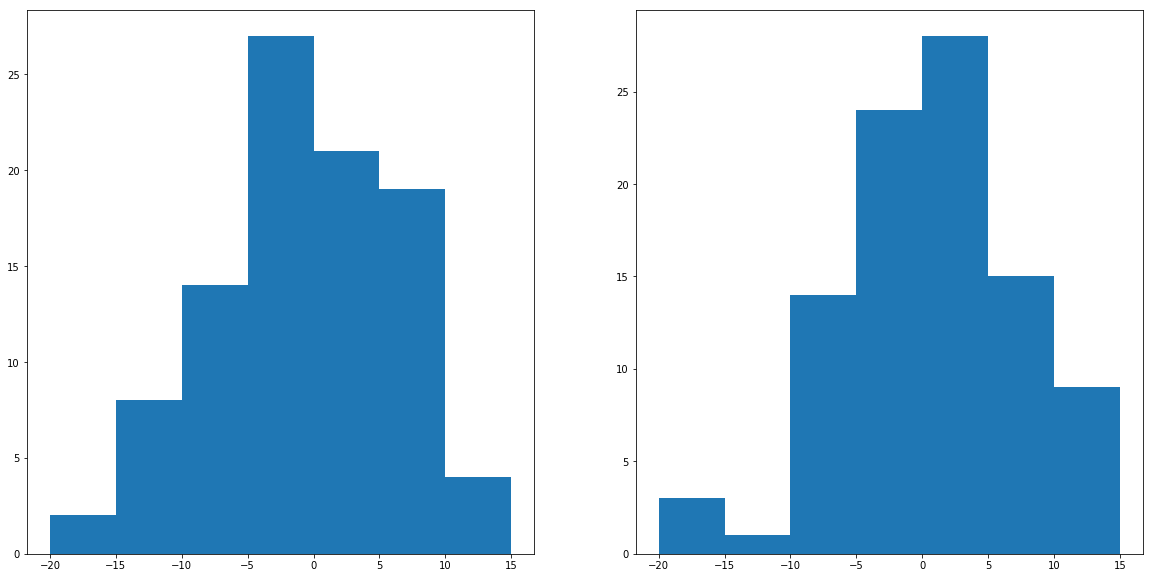

In [534]:
plt.figure(1, (20, 10))
plt.subplot(121)
plt.hist(diff, bins = list(range(-20,20, 5)))
plt.subplot(122)
plt.hist(CRN_diff, bins = list(range(-20,20, 5)))
plt.show()

#### The histogram of the que times reveals that with the common random numbers the histogram has a much higher peak. This means that the mass is centered around the center so the deviation is smaller.